In [2]:
import numpy as np 
from matplotlib import colors
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [40]:
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label

    """

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, dimen=2, theta=0.1):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.dim = dimen
        self.theta = theta
        #parameters
        self.lamb = np.array([])

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : 次の形のndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        np.random.seed(0)
        self.lamb = np.random.rand(X.shape[0], 1) * 0.03

        for _ in range(self.iter):
            self.svc_hypothesis(X, y)
        
        self.thresh()
    
        self.lambda_sv = self.lamb[self.index]
        self.x_sv = X[self.index]
        self.y_sv = y[self.index]


    # problem 3
    def predict(self, X):
        """
        Estimate the label using the SVM classifier.

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        self.y_pred = 0
        for i in range(self.lambda_sv.shape[0]):
            
            self.y_pred += self.lambda_sv[i] * self.y_sv[i] * (X @ self.x_sv[i].reshape(1, -1).T)
        
        self.y_pred = np.where(self.y_pred > 1, 1, 0)
        return self.y_pred
    
    #probelm 1
    def svc_hypothesis (self, x_val, y_val):
        rows = x_val.shape[0]
        y_val = y_val.reshape((-1, 1))
  
        for i in range(rows):
            temp = 0
            for j in range(rows):
                temp += self.lamb[j] *y_val[i]*y_val[j] * (x_val[i].T @ x_val[j])
            self.lamb[i] += self.lr * (1- temp)
            self.lamb[self.lamb <=0] = 0
        
    
    def thresh(self):
        self.index = []
        for j, i in enumerate(self.lamb):
            if i > self.threshold:
                self.index.append(j)
        
        return self.index
    
    

In [57]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [4]:
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    f1_score, 
    confusion_matrix
)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [54]:
iris = load_iris()

data = np.hstack([iris.data, iris.target.reshape(-1, 1)])

data = data[data[:, 4] != 2]

x_train, x_test, y_train, y_test = train_test_split(data[:, 1:3], data[:, 4], test_size=0.3)

### Problem 4

In [59]:
model = ScratchSVMClassifier(num_iter=100, lr=1e-3)
model.fit(x_train, y_train)


In [60]:

pred = model.predict(x_test)

Text(0, 0.5, 'True value')

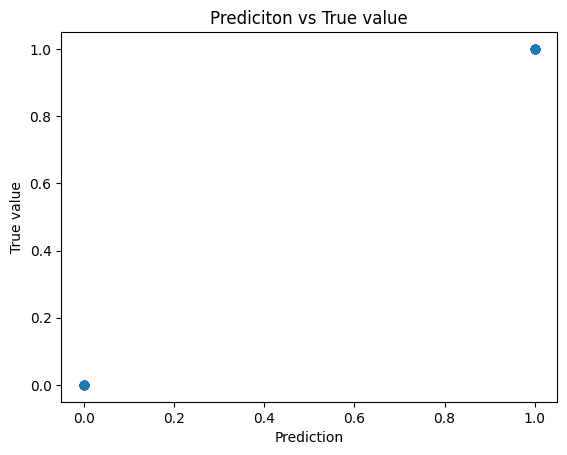

In [61]:
plt.scatter(pred, y_test)
plt.title("Prediciton vs True value")
plt.xlabel("Prediction")
plt.ylabel("True value")

#### Confusion matrix

In [62]:
confusion_matrix(y_test, pred)

array([[18,  0],
       [ 0, 12]], dtype=int64)

#### Recall

In [63]:
recall_score(y_test, pred)

1.0

#### F1_score

In [64]:
f1_score(y_test, pred)

1.0

#### Accuracy

In [65]:
accuracy_score(y_test, pred)

1.0

### Problem 5

(156800, 2)


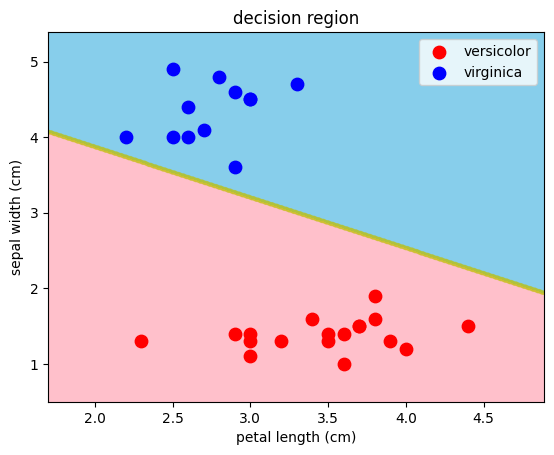

In [56]:
decision_region(x_test, y_test, model, ylabel="sepal width (cm)", xlabel="petal length (cm)")

In [47]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']